In [85]:
# Configuration
geneticCode=11 # Bacterial
windowWidth=40
cdsSpan=100
utrSpan=100
randomizationDepth=200

In [86]:
import numpy  as np
import pandas as pd
from codon_randomization import SynonymousCodonPermutingRandomization, NucleotidePermutationRandomization
from rnafold_vienna import RNAfold_direct

cdsRand = SynonymousCodonPermutingRandomization(geneticCode=geneticCode)
utrRand = NucleotidePermutationRandomization()

# Full length
cdsSeq1 = 'agtggctcaacagtggtaacactggaagcacccgctacttaccacacctccgacagtggtaacacgctgatttatactgggctcaacgcgactcttttgggcacccgctcaacagtggtaacactggacttaccaggcgactgaggaggcgggggtggaggcgggggatta'
utrSeq1 = 'ccactacgacgactgcgctacgatcgcctcgtaagatctacccagatccgacccgaccgcgctagccaacacgatcccggatggacggctcgctaggcatcgaccaccaaccaactagacgacccgactacgagggacgagggcgatgctcac'
#
#cdsSeq1 = 'agtggctcaacagtggtaacactggaagcacccgctaccgacagtggtaacacgctgatttatactgggctcaacgcgagctcaacagtggtaacactggacttaccaggcgactgatta'
#utrSeq1 = 'ccactacgacgactgcgctacgatcgcctcccacgtaagatctacccagatccggacggctcgctaggcatcgaccaccaaccaactagacgacccgactacgagggacgagggcgatgctcac'


def makeRandomizationsForCDSand3UTR(cdsSeq, utrSeq):
    while(True):
        yield (cdsRand.randomize(cdsSeq), utrRand.randomize(utrSeq))


def getLFEforAllWindows( cdsSeq, utrSeq, windowWidth=40, cdsSpan=100, utrSpan=100):
    seq = cdsSeq + utrSeq
    
    firstWindow = len(cdsSeq) - (cdsSpan + windowWidth)
    cdsPad = 0
    if firstWindow < 0:
        cdsPad      = -firstWindow
        firstWindow = 0
    lastWindow  = min(  len(utrSeq) + utrSpan, utrSpan )
    utrPad = 0
    if lastWindow > len(utrSeq) - windowWidth:
        utrPad      = lastWindow - (len(utrSeq) - windowWidth)
        lastWindow = len(utrSeq) - windowWidth
    
    print('cds: {} utr: {} first: {} last: {}'.format(len(cdsSeq), len(utrSeq), firstWindow, lastWindow ))
    
    # windows fully contained in CDS
    for i, pos in enumerate(range(firstWindow, len(cdsSeq)-windowWidth)):
        yield (pos, pos+40, 0, 0)
    
    # windows overlapping CDS and UTR
    for i, pos in enumerate(range(len(cdsSeq)-windowWidth, len(cdsSeq))):
        yield(len(cdsSeq)-windowWidth+i, len(cdsSeq), 0, i )
        
    # windows fully contained in UTR
    for i, pos in enumerate(range(windowWidth, lastWindow)):
        yield(len(cdsSeq), len(cdsSeq), i, i+windowWidth )


LFEs = []
for a in getLFEforAllWindows( cdsSeq1, utrSeq1, windowWidth=windowWidth, cdsSpan=cdsSpan, utrSpan=utrSpan):
    assert( (a[1]-a[0]) + (a[3]-a[2]) == windowWidth )
    seqToFold = cdsSeq1[a[0]:a[1]] + utrSeq1[a[2]:a[3]]
    assert(len(seqToFold)==windowWidth)
    LFE = RNAfold_direct( seqToFold )
    LFEs.append(LFE)
nativeLFE = np.expand_dims( np.array(LFEs), axis=0 )
print(nativeLFE.shape)
        
randomLFEs = []
for n, randSeqs in enumerate( makeRandomizationsForCDSand3UTR( cdsSeq1, utrSeq1)):
    randCDSresult, randUTRresult = randSeqs
    randCDS = randCDSresult[2]
    randUTR = randUTRresult[2]
    #print((randCDS, randUTR))
    
    LFEs = []
    for a in getLFEforAllWindows( randCDS, randUTR, windowWidth=windowWidth, cdsSpan=cdsSpan, utrSpan=utrSpan):
        assert( (a[1]-a[0]) + (a[3]-a[2]) == windowWidth )
        seqToFold = randCDS[a[0]:a[1]] + randUTR[a[2]:a[3]]
        assert(len(seqToFold)==windowWidth)
        LFE = RNAfold_direct( seqToFold )
        LFEs.append(LFE)
    
    randomLFEs.append( np.array(LFEs) )
    if n>=randomizationDepth-1: break

randomLFEs = np.vstack(randomLFEs)

#print(nativeLFE)
#print(np.array(randomLFEs).mean())
#print(randomLFEs)
print(randomLFEs.shape)

print(randomLFEs.mean(axis=0))
print(randomLFEs.mean(axis=0).shape)

dLFE = (nativeLFE - randomLFEs).mean(axis=0)

cds: 171 utr: 153 first: 31 last: 100
(1, 200)
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds: 171 utr: 153 first: 31 last: 100
cds

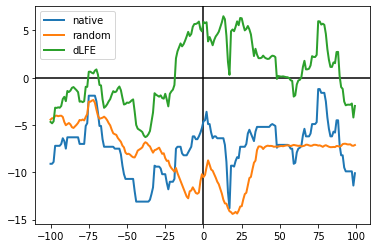

In [87]:
import matplotlib.pyplot as plt
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
plt.plot(range(-100,100), nativeLFE[0,:], lw=2, label='native')
plt.plot(range(-100,100), randomLFEs.mean(axis=0), lw=2, label='random')
plt.plot(range(-100,100), dLFE, lw=2, label='dLFE')
plt.legend();